In [2]:
import numpy as np

In [3]:
from scipy import signal 

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
fs = 102400
duration_time = 0.001
duration_count = int(duration_time*fs)
time_s = np.arange(duration_count)/fs
f = (10000-3000)/duration_time*time_s + 3000
s = np.sin(2*np.pi*f*time_s)
window = signal.get_window("hann", len(s), True)
window_s = s*window
duration_total = int(0.005*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

<IPython.core.display.Javascript object>


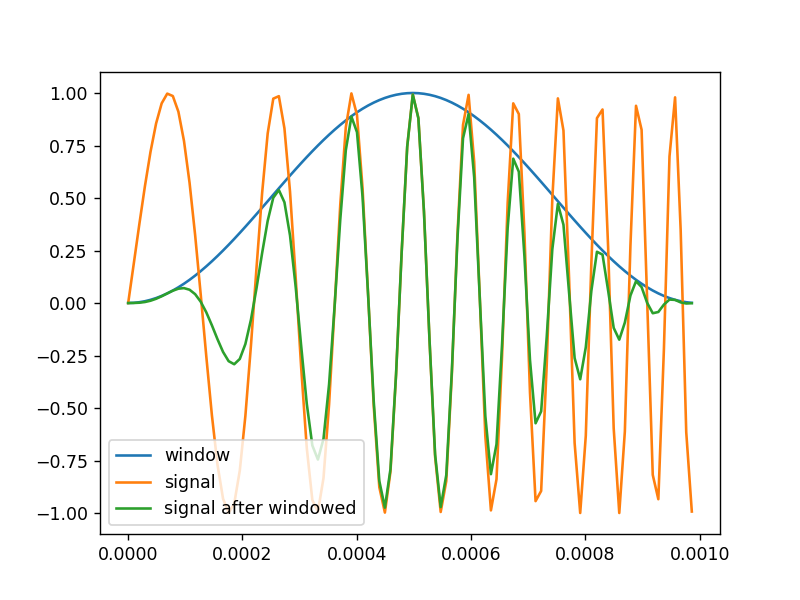

In [6]:
fig, ax = plt.subplots()
ax.plot(time_s, window, label="window")
ax.plot(time_s, s, label="signal")
ax.plot(time_s, window_s, label="signal after windowed")
ax.legend()

<IPython.core.display.Javascript object>


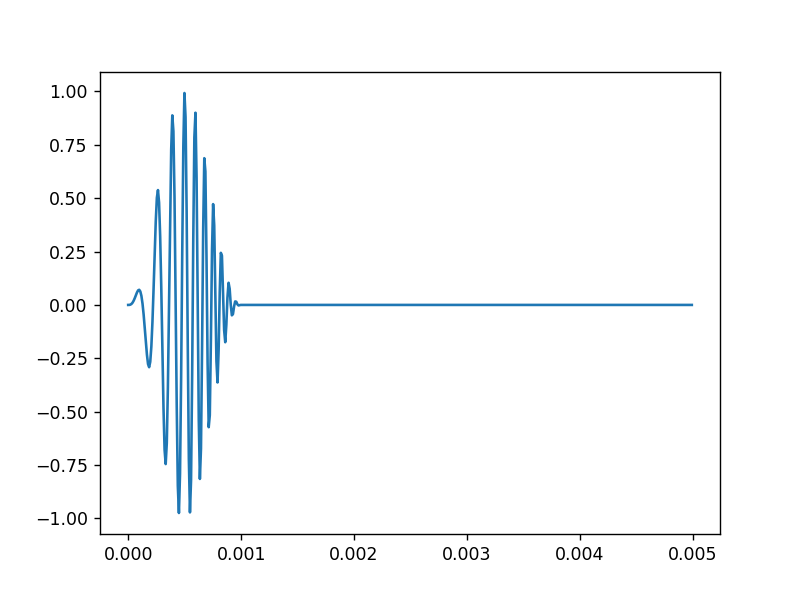

In [7]:
fig, ax = plt.subplots()
ax.plot(time, s_origin)

In [8]:
time_delay_1 = 0.002
time_delay_2 = 0.0025
alpha_1 = 0.5
alpha_2 = 0.1
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))
s_2 = np.concatenate((np.zeros(int(time_delay_2*fs)), alpha_2*window_s))
s_2 = np.concatenate((s_2, np.zeros(duration_total-len(s_2))))
np.random.seed(0)
signal_multipath = s_origin + s_1 + s_2 + 0.005*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


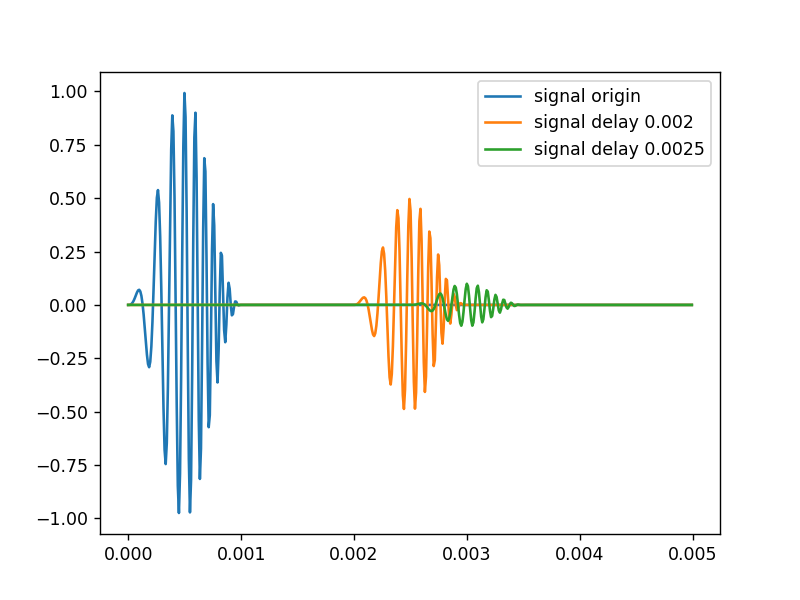

In [9]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="signal origin")
ax.plot(time, s_1, label="signal delay {}".format(time_delay_1))
ax.plot(time, s_2, label="signal delay {}".format(time_delay_2))
ax.legend()

<IPython.core.display.Javascript object>


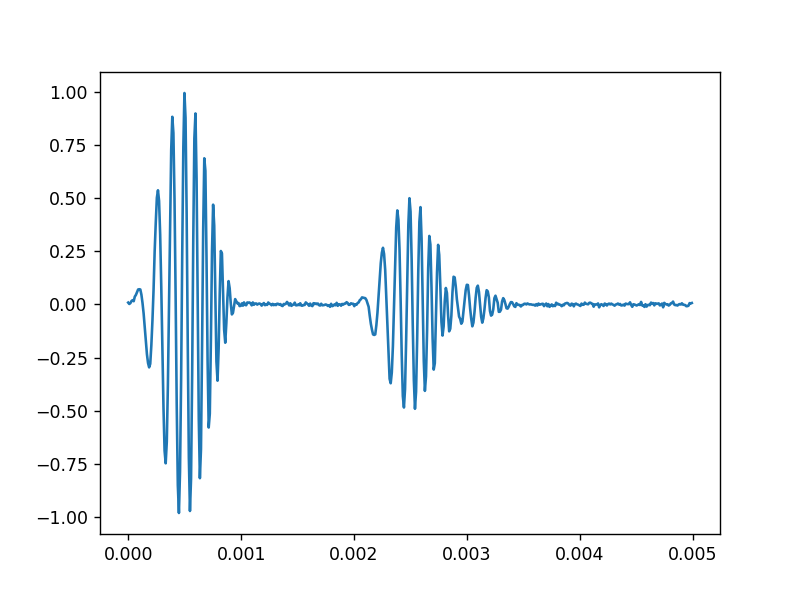

In [10]:
fig, ax = plt.subplots()
ax.plot(time, signal_multipath)

In [11]:
from scipy import signal

<IPython.core.display.Javascript object>


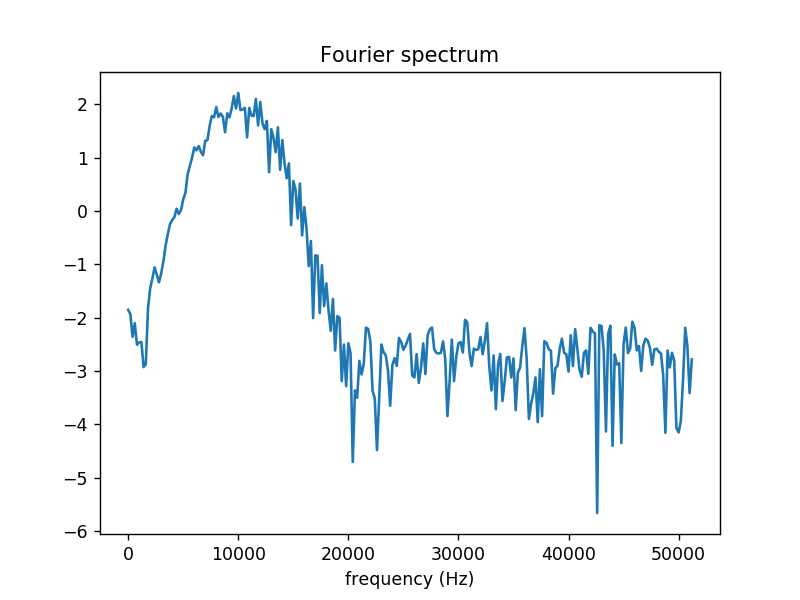

Text(0.5, 1.0, 'Fourier spectrum')

In [12]:
windowed_signal_multipath = signal.get_window("hann", len(signal_multipath)) * signal_multipath
Xk = np.fft.rfft(windowed_signal_multipath)
freq_vector = np.fft.rfftfreq(len(signal_multipath), d=1/fs)

log_X = np.log(np.abs(Xk))

fig, ax = plt.subplots()
ax.plot(freq_vector, log_X)
ax.set_xlabel('frequency (Hz)')
ax.set_title('Fourier spectrum')

<IPython.core.display.Javascript object>


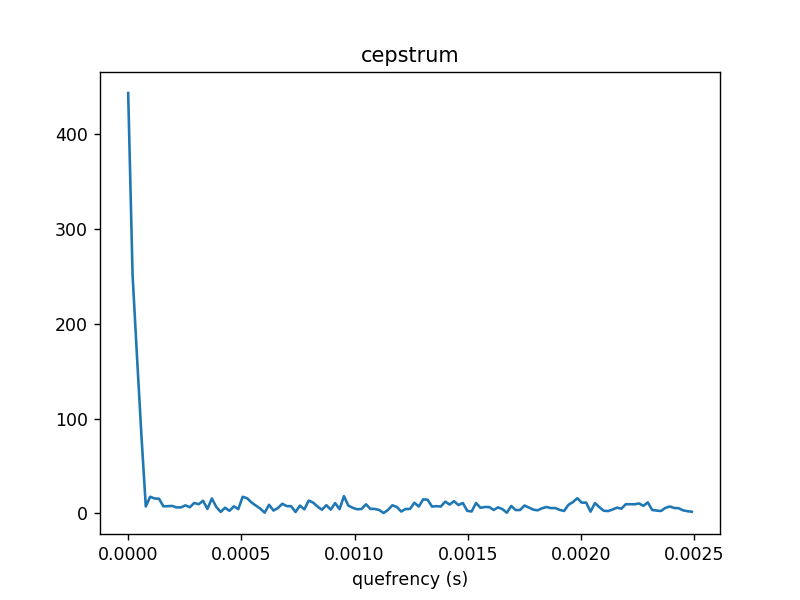

Text(0.5, 1.0, 'cepstrum')

In [13]:
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots()
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')

In [14]:
fs

102400